# Libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

# Parameters & Directories

In [45]:
from matplotlib.font_manager import findSystemFonts
import matplotlib.font_manager as font_manager
# fonts = findSystemFonts(fontpaths=['./nimbus-sans-l/'])
fonts = findSystemFonts()
for font in fonts:
    try:
        font_manager.fontManager.addfont(font)
    except:
        print(font)


/System/Library/Fonts/LastResort.otf
/System/Library/Fonts/Apple Color Emoji.ttc
/System/Library/Fonts/Supplemental/NISC18030.ttf


In [56]:
fs = []
for f in font_manager.fontManager.ttflist:
    fs.append(f.name)
set(fs)

{'.Aqua Kana',
 '.Arabic UI Display',
 '.Arabic UI Text',
 '.Helvetica Neue DeskInterface',
 '.Keyboard',
 '.New York',
 '.SF Arabic',
 '.SF Arabic Rounded',
 '.SF Armenian',
 '.SF Armenian Rounded',
 '.SF Camera',
 '.SF Compact',
 '.SF Compact Display',
 '.SF Compact Rounded',
 '.SF Compact Text',
 '.SF Georgian',
 '.SF Georgian Rounded',
 '.SF Hebrew',
 '.SF Hebrew Rounded',
 '.SF NS Display Condensed',
 '.SF NS Mono',
 '.SF NS Rounded',
 '.SF NS Text Condensed',
 '.SF Soft Numeric',
 '.ThonburiUI',
 'Academy Engraved LET',
 'Al Bayan',
 'Al Nile',
 'Al Tarikh',
 'American Typewriter',
 'Andale Mono',
 'Apple Braille',
 'Apple Chancery',
 'Apple SD Gothic Neo',
 'Apple Symbols',
 'AppleGothic',
 'AppleMyungjo',
 'Arial',
 'Arial Black',
 'Arial Hebrew',
 'Arial Narrow',
 'Arial Rounded MT Bold',
 'Arial Unicode MS',
 'Athelas',
 'Avenir',
 'Avenir Next',
 'Avenir Next Condensed',
 'Ayuthaya',
 'Baghdad',
 'Bangla MN',
 'Bangla Sangam MN',
 'Baskerville',
 'Beirut',
 'Big Caslon',
 'B

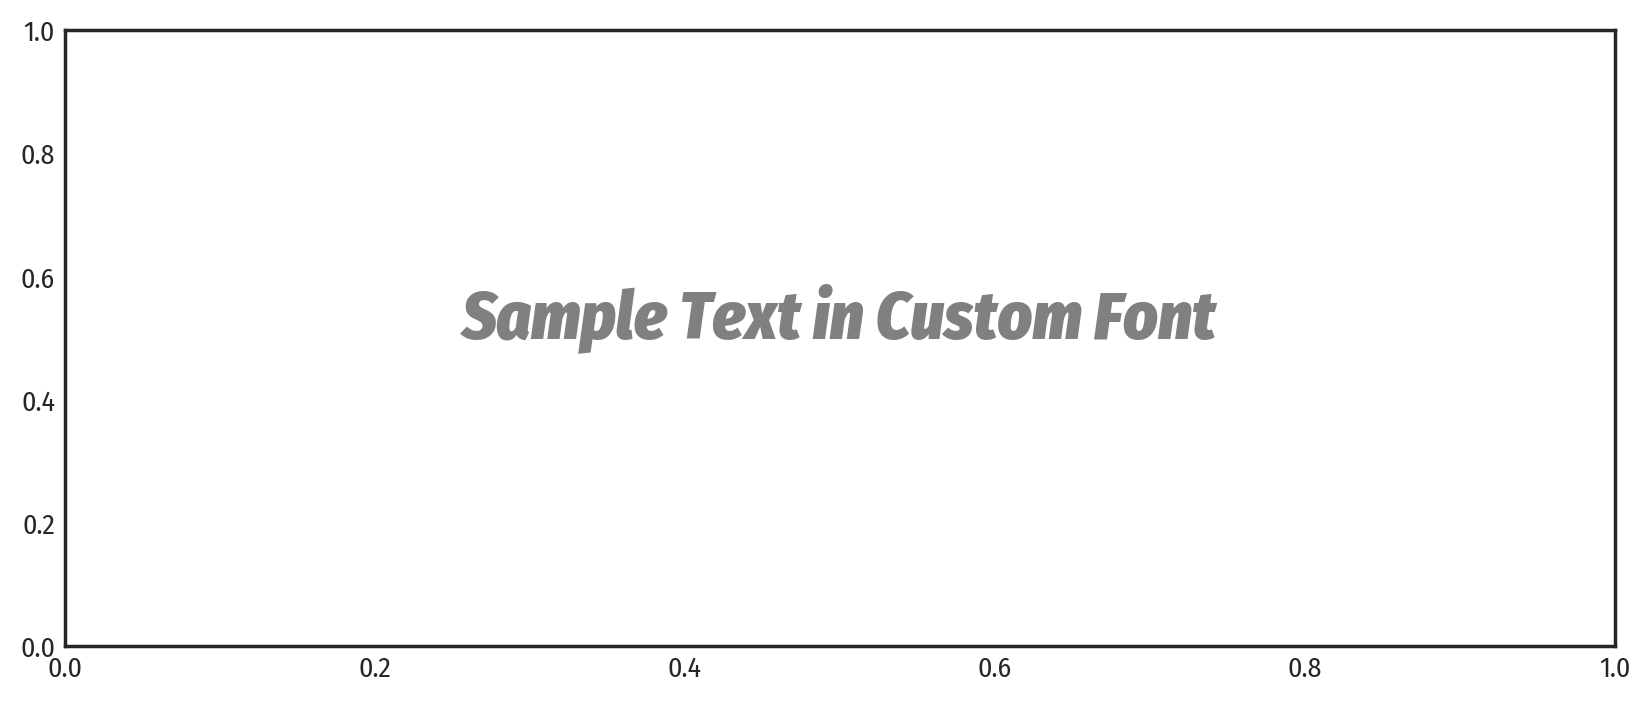

In [59]:
%matplotlib inline
f = 'Fira Sans Condensed'
%config InlineBackend.figure_format='retina'
mpl.style.use('seaborn-v0_8-white')
mpl.rcParams["figure.figsize"] = (10,10)
mpl.rcParams['font.family'] = f'{f}'
mpl.rcParams['font.sans-serif'] = 'sans-serif'
mpl.rcParams["font.style"] = "normal"
mpl.rcParams["font.weight"] = "normal"
mpl.rcParams["axes.labelcolor"] = "gray"
mpl.rcParams["text.color"] = "grey"
plt.figure(figsize=(10, 4))
plt.text(0.5, 0.5, 'Sample Text in Custom Font', fontsize=24, 
         ha='center', fontname=f'{f}', weight='black', style="italic")
plt.show()

In [4]:
pd.set_option('mode.chained_assignment', None)

In [5]:
DIR = os.path.dirname(os.getcwd()) + "/"
DATA = DIR + 'data/'
FIG = DIR + 'reports/figures/'




# Read in Data

In [122]:
states_df = pd.read_csv(DATA + "processed/" + "pro_19cStates.csv")
states_df.shape

(1990, 91)

# Set Globals

In [123]:
# Development of states
DEV_STATE = ['sy_gdp',
             # 'sy_urb_pop',
             'sy_xtr_urban',
             # 'sy_pop',
             'sy_lifeex',
             "sy_trnsprnt", 
             "sy_brcrcy",
             # "sy_pollib",
            ]

# Conflict
CONFLICT = ['sy_war',
            'sy_riots'
           ]

# Nationalization of states 
NAT_STATE = [
             # 'sy_anthem',
             # 'sy_flag',
             # 'sy_old_nat',
             'sy_xtr_enrll',
             'sy_ministry',
             'sy_citizenship',
             'sy_nat_bank',
             'sy_dom_autonomy',
             # 'sy_int_autonomy',
             # "sy_territory",
             # 'sy_indep',
             'sy_suffrage',
             'sy_pollib',
             # 'sy_civlib',
            ]
# Scientization of states
SCI_STATE = ['sy_stats_agency',
             'sy_yrbk_cov',
             'sy_yrbk_pub',
             # 'sy_unis',
             'sy_acad_free', 
             'sy_census_cum', 
             'sy_confs_sci_ref',
             # 'sy_confs_sci',
            ]

# Degree of nationalization of states, worldwide
NAT_WORLD = [
             # 'wy_anthem',
             'wy_xtr_enrll',
             'wy_ministry',
             'wy_citizenship',
             'wy_nat_bank',
             'wy_dom_autonomy',
             # 'wy_int_autonomy', 
             # 'wy_flag',
             'wy_suffrage',
             # 'wy_civlib',
             # 'wy_territory',
             'wy_pollib',
            ]

# Degree of scientization of states, worldwide
SCI_WORLD = ['wy_stats_agency',
             'wy_yrbk_cov',
             'wy_yrbk_pub',
             # 'wy_unis',
             'wy_acad_free',
             'wy_census_ever',
             'wy_confs_sci_ref',
             # 'wy_confs_sci',
             'wy_stats_journals',
             'wy_soc_journals',
             'wy_societies', 
            ]

# Sci and nat globals
GLOBALS = {"sy_dev_state": DEV_STATE,
           "sy_nat_state": NAT_STATE,
           "sy_sci_state": SCI_STATE,
           "sy_state_mdl": NAT_STATE+SCI_STATE,
           "wy_nat_world": NAT_WORLD,
           "wy_sci_world": SCI_WORLD,
           "wy_state_mdl": NAT_WORLD+SCI_WORLD,
          }

ALL = DEV_STATE + NAT_STATE + SCI_STATE + NAT_WORLD + SCI_WORLD + CONFLICT

# Nationalization Indicators

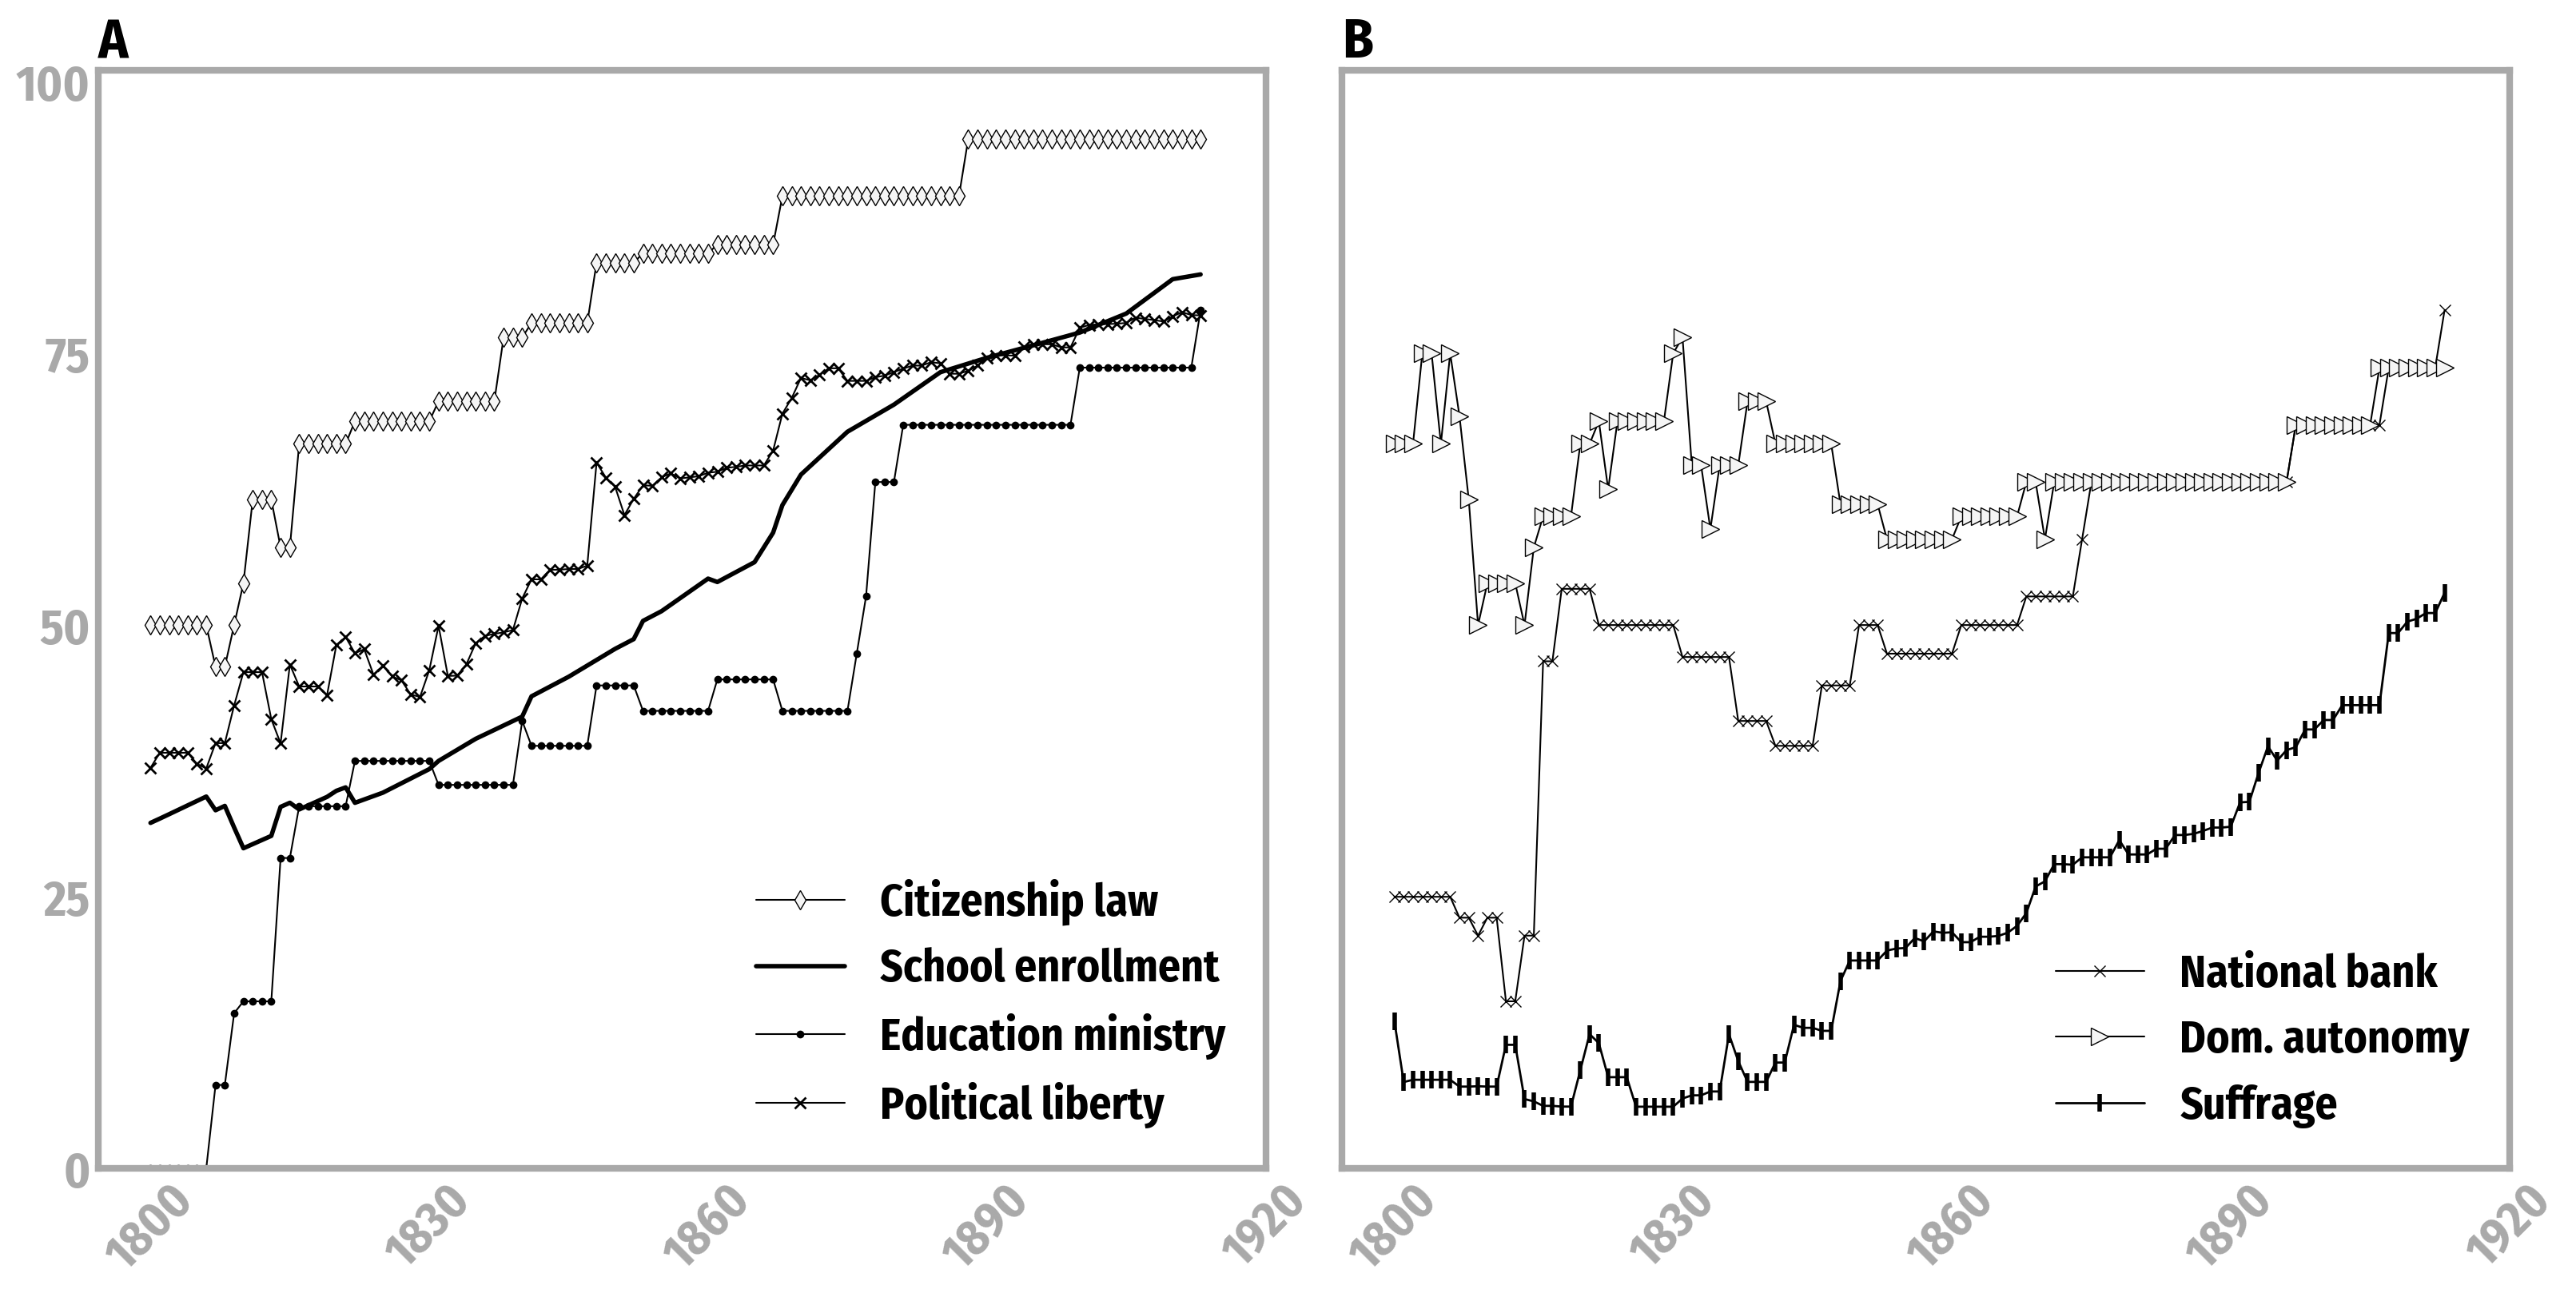

In [124]:
NAT_STATE = [
             # 'sy_anthem',
             # 'sy_flag',
             # 'sy_old_nat',
             'sy_xtr_enrll',
             'sy_ministry',
             'sy_citizenship',
             'sy_nat_bank',
             'sy_dom_autonomy',
             # 'sy_int_autonomy',
             # "sy_territory",
             # 'sy_indep',
             'sy_suffrage',
             'sy_pollib',
             # 'sy_civlib',
            ]
states_df["sy_dom_autonomy_b"] = np.where(states_df['sy_dom_autonomy'] < 1, 0, 1)
# ---------------------------------------------------------------
# Aesthetic parameters
# ---------------------------------------------------------------
fig, axs = plt.subplots(1, 2, layout="constrained", figsize=(16,8), sharex=True, sharey=True)
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
# font_weight = "bold"
font_weight = "bold"
font_size = 22
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')
plt.setp(axs[0].spines.values(), color=tick_color, lw=3);
plt.setp(axs[1].spines.values(), color=tick_color, lw=3);
plt.ylim(0, 101)

# ---------------------------------------------------------------
# A
# ---------------------------------------------------------------
axs[0].set_title("A", fontsize=25, weight=font_weight, loc='left', c='black')
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_citizenship'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=6, 
         markeredgewidth=.5, 
         markerfacecolor=data_color,
         markeredgecolor=title_color,
         label = "Citizenship law")
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_xtr_enrll'].mean(),
         lw=2,  
         color=title_color,
         label = "School enrollment")
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_ministry'].mean()*100,
         lw=.75, 
         marker='o', 
         markerfacecolor="black",
         markersize=2.5,
         color=title_color,
         label = "Education ministry")
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_pollib'].mean()*100, 
         lw=.75, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
         markerfacecolor=data_color,
         label = "Political liberty")
axs[0].legend(prop={'weight':font_weight, "size": 20}, labelcolor='black', loc="lower right");
axs[0].set_yticks(range(0,101,25))
axs[0].set_yticklabels(range(0,101,25), weight=font_weight, fontsize=font_size)
axs[0].set_xticks(range(1800,1921,30))
axs[0].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)


# ---------------------------------------------------------------
# B
# ---------------------------------------------------------------
axs[1].set_title("B", fontsize=25, weight=font_weight, loc='left', c="black")
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_nat_bank'].mean()*100,
         lw=.75, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
         label="National bank")
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_dom_autonomy_b'].mean()*100,
         lw=.75, 
         marker='>', 
         color=title_color, 
         markersize=8, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
         label="Dom. autonomy")
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_suffrage'].mean(), 
         lw=1, 
         marker='|', 
         color=title_color, 
         markersize=8, 
         markeredgewidth=2, 
         markeredgecolor=title_color, 
         label = "Suffrage")


axs[1].set_xticks(range(1800,1921,30))
axs[1].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)
# axs[1].legend(
#               loc='lower right',
#               prop=font);
axs[1].legend(prop={'weight':font_weight, "size": 20}, labelcolor='black', loc="lower right")
plt.savefig(FIG+"figure1.pdf")

# Scientization Indicators

In [125]:
states_df['sy_acad_free_b'] = np.where(states_df['sy_acad_free']< 1, 0, 1)

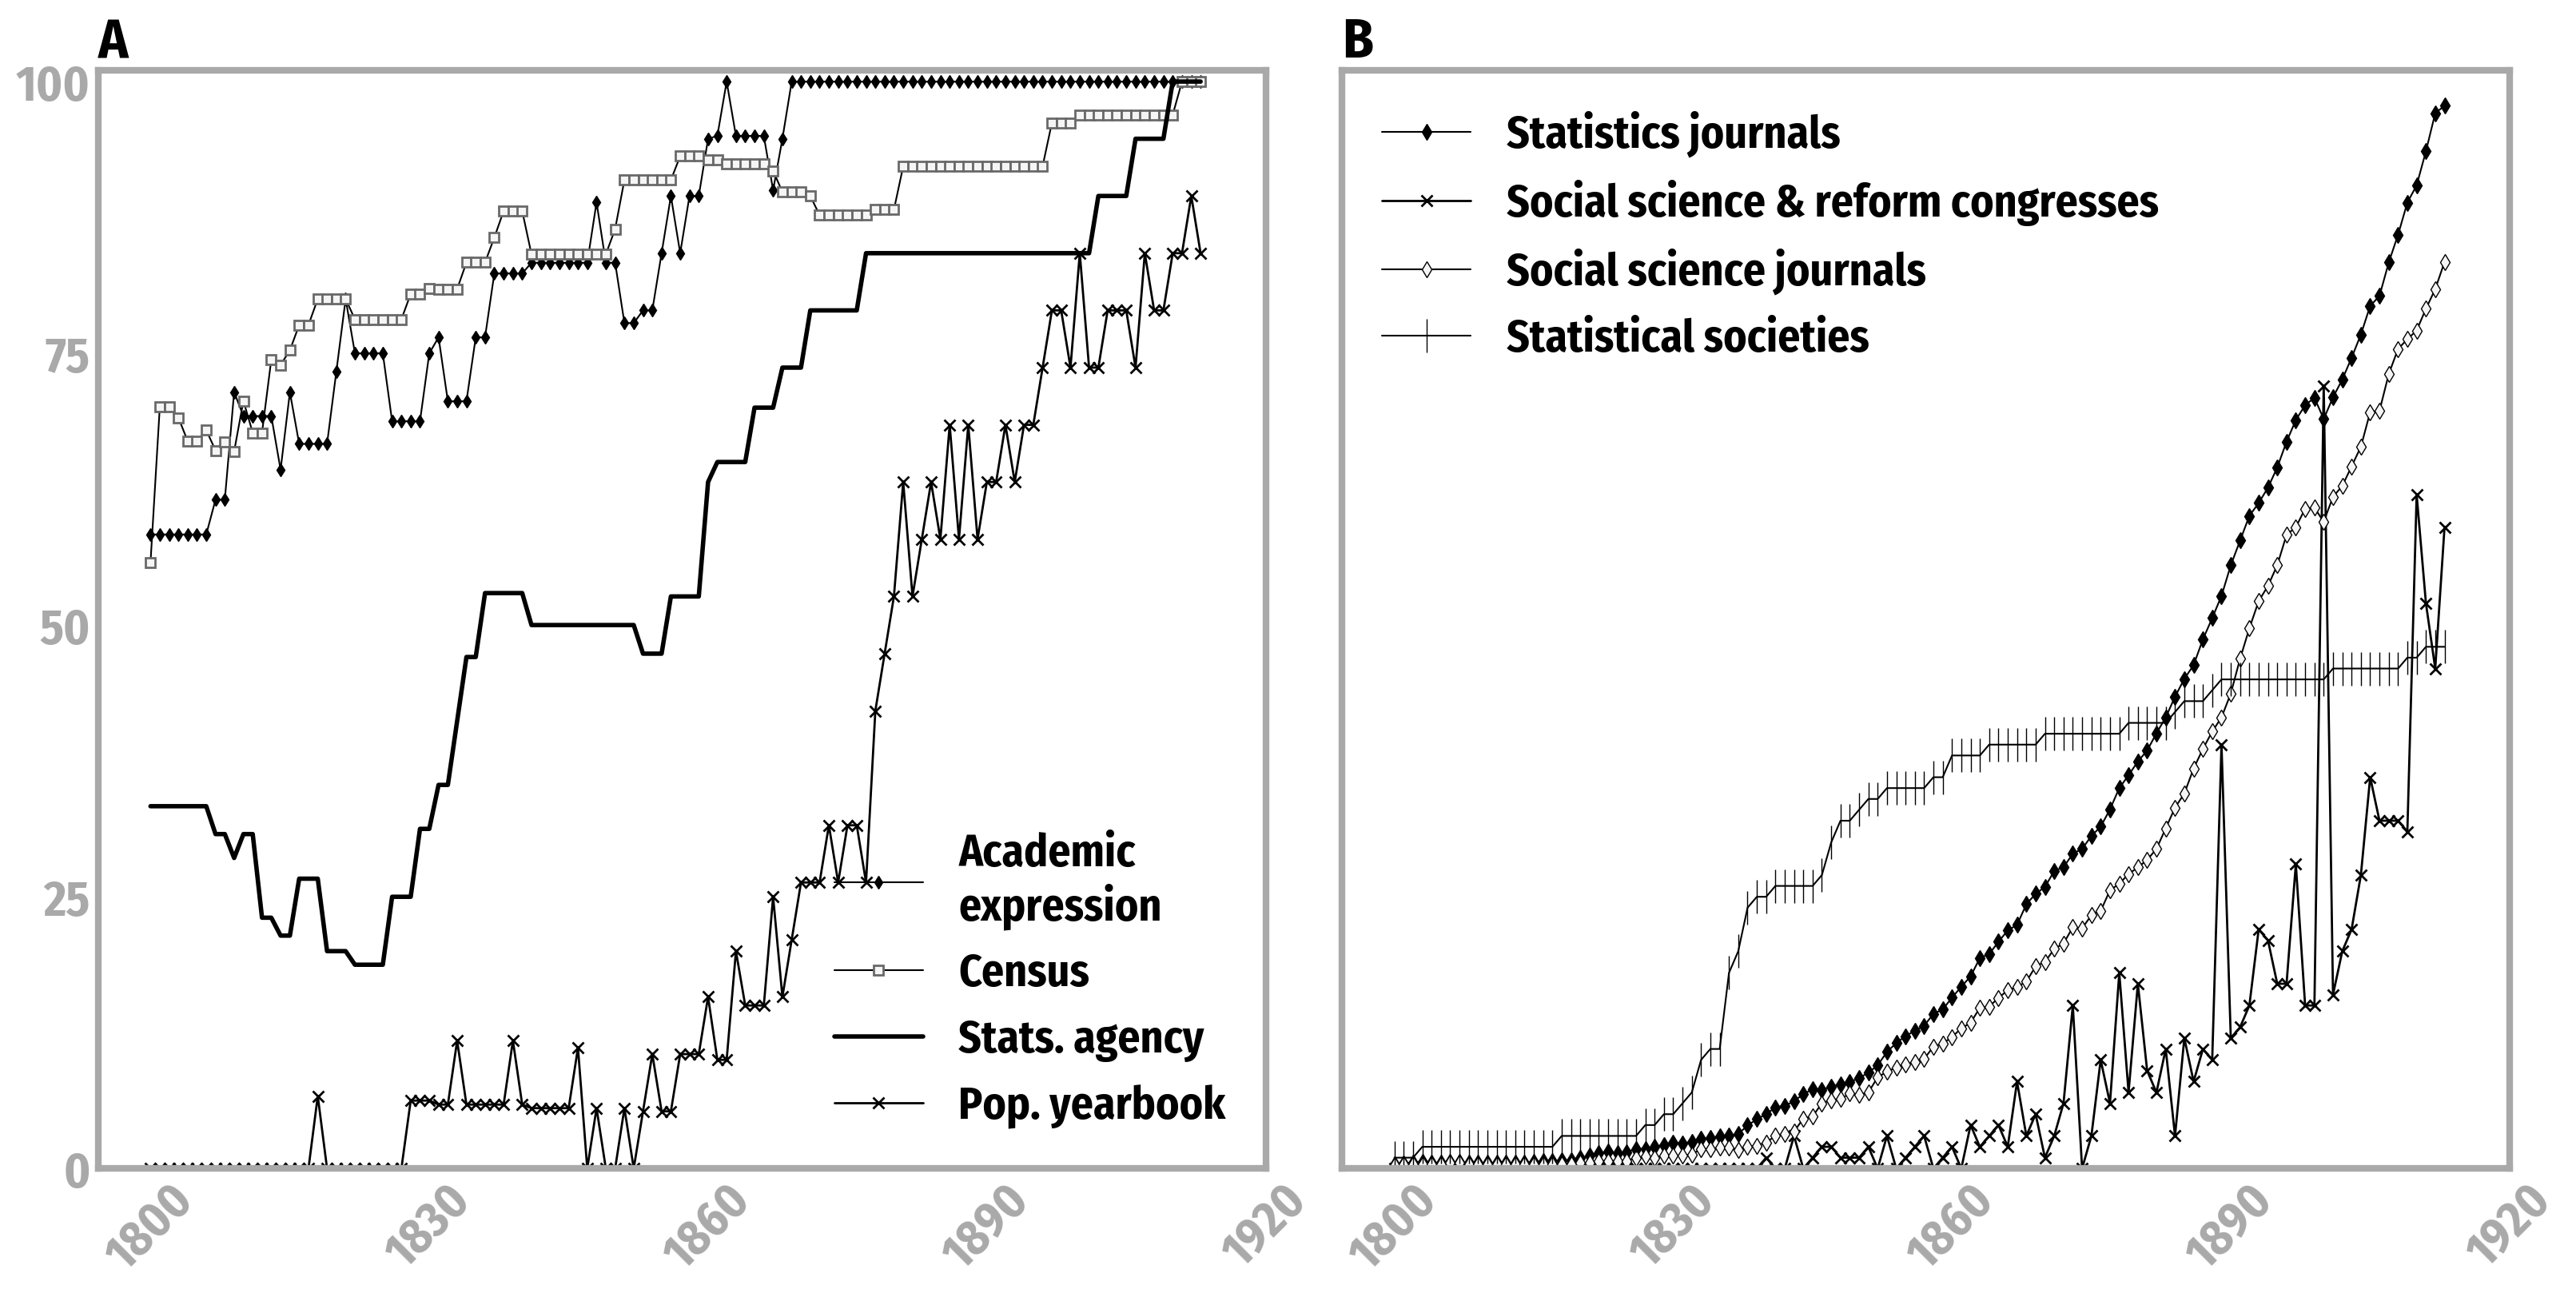

In [131]:
# Scientization of states
SCI_STATE = ['sy_stats_agency',
             'sy_yrbk_cov',
             'sy_yrbk_pub',
             # 'sy_unis',
             'sy_acad_free', 
             'sy_census_cum', 
             'sy_confs_sci_ref',
             # 'sy_confs_sci',
            ]

# Degree of scientization of states, worldwide
SCI_WORLD = ['wy_stats_agency',
             'wy_yrbk_cov',
             'wy_yrbk_pub',
             # 'wy_unis',
             'wy_acad_free',
             'wy_census_ever',
             'wy_confs_sci_ref',
             # 'wy_confs_sci',
             'wy_stats_journals',
             'wy_soc_journals',
             'wy_societies', 
            ]

# ---------------------------------------------------------------
# Aesthetic parameters
# ---------------------------------------------------------------
fig, axs = plt.subplots(1, 2, layout="constrained", figsize=(16,8), sharex=True, sharey=True)
title_color, tick_color, edge_color, data_color = 'black', 'darkgray', 'dimgray', 'whitesmoke'
font_weight = "bold"
font_size = 22
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')
plt.setp(axs[0].spines.values(), color=tick_color, lw=3);
plt.setp(axs[1].spines.values(), color=tick_color, lw=3);
plt.ylim(0, 101)



# ---------------------------------------------------------------
# A
# ---------------------------------------------------------------
axs[0].set_title("A", fontsize=25, weight=font_weight, loc='left', c="black")
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_acad_free_b'].mean()*100,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=4, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=title_color,
         label="Academic\nexpression",
           )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_census_ever'].mean()*100,
         lw=.75, 
         marker='s', 
         color=title_color, 
         markersize=4, 
         markeredgewidth=1, 
         markeredgecolor=edge_color, 
         markerfacecolor=data_color,
         label="Census",
           )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_stats_agency'].mean()*100,
         lw=2, 
         marker=None, 
         color=title_color, 
         markersize=10, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
         label="Stats. agency",
           )
axs[0].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['sy_yrbk_pub'].mean()*100,
         lw=1, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
         markerfacecolor="None",
         label="Pop. yearbook",
           )
axs[0].set_yticks(range(0,101,25))
axs[0].set_yticklabels(range(0,101,25), weight=font_weight, fontsize=font_size)
axs[0].set_xticks(range(1800,1921,30))
axs[0].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)
axs[0].legend(
              loc='lower right',
              prop={'size': 20,'weight':font_weight}, labelcolor="black");
# axs[0].legend(['Acad. express.\nnot wholly\ncensored',
#             'Popul. Census',
#             'Stats. agency', 
#             'Universities',
#             'Stats. journals', 
#             ],
#           loc='lower right',
#           prop={'size': 20, 'weight': 'bold'});


# ---------------------------------------------------------------
# B
# ---------------------------------------------------------------
axs[1].set_title("B", fontsize=25, weight=font_weight, loc='left', c="black")
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_stats_journals'].mean()/22,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=None,
         label="Statistics journals",
           )
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_confs_sci_ref'].mean(),
         lw=1, 
         marker='x', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=1, 
         markeredgecolor=title_color, 
         label="Social science & reform congresses",
           )

axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_soc_journals'].mean()/10,
         lw=.75, 
         marker='d', 
         color=title_color, 
         markersize=5, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
         label="Social science journals",
           )
axs[1].plot(sorted(states_df['year'].unique()), 
         states_df.groupby('year')['wy_societies'].mean(),
         lw=.75, 
         marker='|', 
         color=title_color, 
         markersize=15, 
         markeredgewidth=.5, 
         markeredgecolor=title_color,
         markerfacecolor=data_color,
         label="Statistical societies",
           )

            
axs[1].set_xticks(range(1800,1921,30))
axs[1].set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=font_size)
axs[1].legend(
              loc='upper left',
              prop={'size': 20, "weight":font_weight}, labelcolor="black");
# plt.legend(['Statistics journals$^{†}$' ,
#             'Int. social science & social reform\ncongresses',
#             'Social science journals', 
#             'Statistics societies$^{†}$'],
#           loc='upper left',
#           prop={'size': 20, 'weight': 'bold'});

plt.savefig(FIG+"figure2.pdf")

# Composites

In [127]:
states_df['sy_model'] = (states_df['sy_nat_state'] + states_df['sy_sci_state']) / 2

In [128]:
def gen_plot(ax, ys_tpl, fontsize=12, hide_xs=False, lw=1):
    '''
    Takes a plt.subplot and a tuple('state', state_df[DVs])
    Plots the state's dvs over year.
    
    '''
    
    # Grab state name
    state = ys_tpl[0]
    if state == "United States of America":
        state = "United States"
        
    # Grab year array
    X = ys_tpl[1].iloc[:,0]
    
    # Set DV line options
    ax.plot(X, ys_tpl[1].iloc[:,1], lw=lw, color='lightgray')
    ax.plot(X, ys_tpl[1].iloc[:,2], lw=lw, color=edge_color)
    ax.plot(X, ys_tpl[1].iloc[:,3], lw=lw, color=title_color)
    ax.axvline(1880, color="gainsboro", linestyle="dotted");
    ax.set_xticks(range(1800,1921,30))
    ax.set_yticks(range(-2,4,2))
    ax.set_yticklabels(range(-2,4,2), weight=font_weight, fontsize=fontsize)
    ax.set_title(f'{state}', weight=font_weight, fontsize=fontsize, c="black")
    if hide_xs:
        ax.set_xticklabels([])
    else:
        ax.set_xticklabels(range(1800,1921,30), rotation=45, weight=font_weight, fontsize=fontsize)

In [132]:
# Define global of dvs, incl year
states_df['decade'] = states_df['year'] - states_df['year']%10
DVS = ['decade',
       'sy_nat_state',
       'sy_sci_state',
       'sy_model',
       # 'sy_state_mdl',
      ]

# Create a dict of tuples dct{i:('state', state_df[DVS])}
ys = {0: ("West-wide", states_df.groupby('decade')[DVS].mean())}
for i, state_tpl in enumerate(states_df.groupby('state')[DVS]):
    if state_tpl[0] == "US":
        ys[20] = (state_tpl[0], state_tpl[1].groupby('decade')[DVS].mean())
    else:
        ys[i+1] = (state_tpl[0], state_tpl[1].groupby('decade')[DVS].mean())

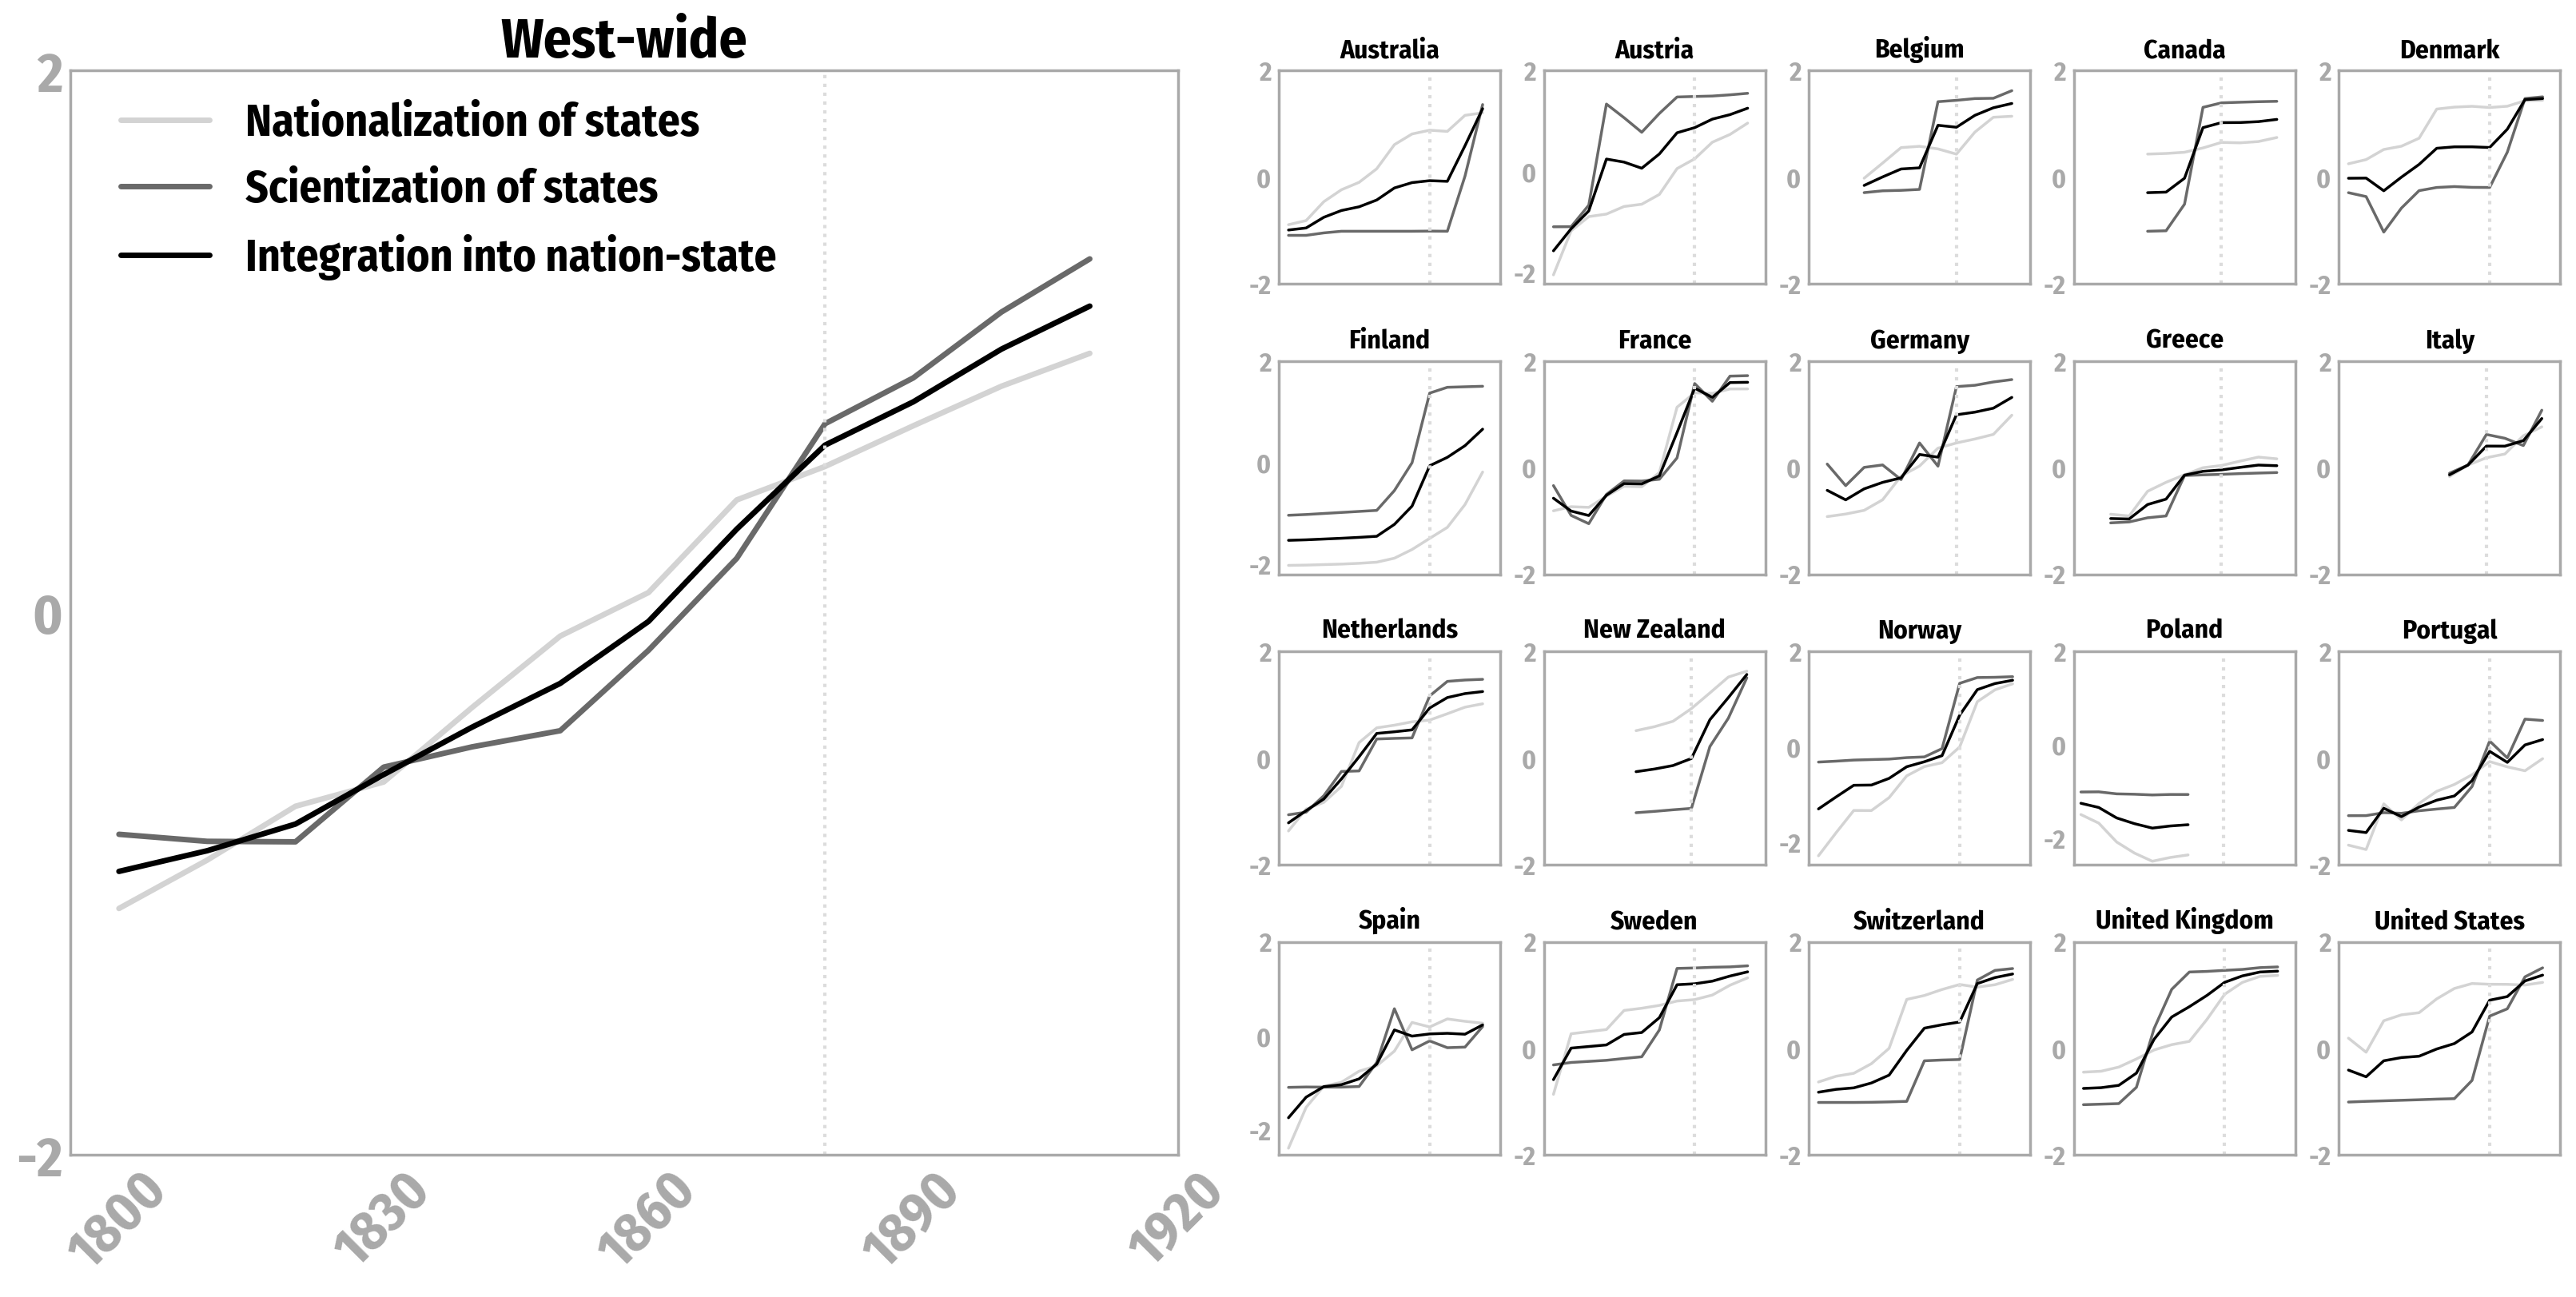

In [133]:
# Set aesthetic parameters
fig = plt.figure(layout='constrained', figsize=(16, 8))
plt.rc('axes', edgecolor='darkgray')
plt.rc('xtick', color='darkgray')
plt.rc('ytick', color='darkgray')

# Superordinate plot will comprise 4 X 10 subplots
plots = []

# West-year trend will fill in all 20 subplots on left
left_side = plt.subplot(4, 10, (1, 35))
plots.append(left_side)

# Right HALF will be 20 country-year trend lines
# First, get coordinates of subplots
right_side = list(range(6,11))
for i in range(10,40,10):
    right_side.extend(list((np.asarray((range(6,11)))+i)))


# Next, sequentially create each right-side subplot
# Add to plot list
for i in right_side:
    plots.append(plt.subplot(4, 10, i))

# Plot each subplot in the list
for i, plot in enumerate(plots):
    # First, the west-year trend
    if i == 0:
        gen_plot(plot, ys[i], fontsize=25, lw=2.5)
    # then all others:
    else:
        gen_plot(plot, ys[i], fontsize=12, lw=1.25, hide_xs=True)

# Add legend
fig.legend(['Nationalization of states',
            'Scientization of states',
            'Integration into nation-state'],
          loc=(.04,.77),
          prop={'size': 20, 'weight': 'bold'}, labelcolor="black");

plt.savefig(FIG+"figure3.pdf")